# <ins> Imports

In [913]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from catboost import CatBoostRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import MinMaxScaler
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score
from scipy.stats import chi2
from scipy.stats import chi2_contingency
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
# Evaluation
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from IPython.display import display_html 
from IPython.display import display
pd.options.display.max_rows = 100
# Converting the default of pandas to show regular numbers instead of Scientific Notation.
pd.set_option('display.float_format', lambda x: '%.3f' % x)
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

# <ins> Load Data

In [914]:
test = pd.read_csv('./test.csv')
train = pd.read_csv('./train.csv')
test_ID = test.Id

# <ins> EDA

In [915]:
def side_by_side_display(df_ls, captions=[], title=''):
    df_ls = [df if type(df) == pd.DataFrame else pd.DataFrame(df) for df in df_ls]
    df_to_display = ''
    for i in range(len(df_ls)):
        if 0 <= i < len(captions):
            caption = captions[i]
        else:
            caption = ''
        df_style = df_ls[i].style.set_table_attributes("style='display:inline'").set_caption(caption)
        df_to_display += df_style._repr_html_()
    print(title)
    display_html(df_to_display, raw=True)
    

In [916]:
train.sample(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
731,732,80,RL,73.000,9590,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Timber,Norm,Norm,1Fam,SLvl,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,442.000,Gd,TA,PConc,Ex,TA,Av,GLQ,786,Unf,0,82,868,GasA,Ex,Y,SBrkr,1146,0,0,1146,1,0,2,0,3,1,Gd,6,Typ,1,Gd,Attchd,2003.000,Fin,2,438,TA,TA,Y,160,22,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,187500
1117,1118,20,RL,57.000,9764,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,Sawyer,Feedr,Norm,1Fam,1Story,5,7,1967,2003,Gable,CompShg,VinylSd,VinylSd,None,0.000,TA,TA,CBlock,TA,TA,No,BLQ,702,Unf,0,192,894,GasA,Ex,Y,SBrkr,894,0,0,894,1,0,1,0,3,1,Gd,5,Typ,0,NaN,Attchd,1967.000,RFn,2,450,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,5,2008,WD,Normal,130000
720,721,120,RL,NaN,6563,Pave,NaN,IR1,Low,AllPub,CulDSac,Mod,StoneBr,Norm,Norm,1Fam,1Story,8,5,1985,1985,Gable,CompShg,HdBoard,HdBoard,None,0.000,Gd,TA,PConc,Gd,TA,Gd,GLQ,1148,Unf,0,594,1742,GasA,TA,Y,SBrkr,1742,0,0,1742,1,0,2,0,2,1,Gd,5,Typ,1,TA,Attchd,1985.000,RFn,2,564,TA,TA,Y,114,28,234,0,0,0,NaN,NaN,NaN,0,12,2006,WD,Normal,275000
1459,1460,20,RL,75.000,9937,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,6,1965,1965,Gable,CompShg,HdBoard,HdBoard,None,0.000,Gd,TA,CBlock,TA,TA,No,BLQ,830,LwQ,290,136,1256,GasA,Gd,Y,SBrkr,1256,0,0,1256,1,0,1,1,3,1,TA,6,Typ,0,NaN,Attchd,1965.000,Fin,1,276,TA,TA,Y,736,68,0,0,0,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500
1405,1406,120,RM,44.000,3842,Pave,NaN,IR1,HLS,AllPub,Inside,Mod,Crawfor,Norm,Norm,TwnhsE,1Story,8,5,2004,2005,Hip,CompShg,CemntBd,CmentBd,Stone,174.000,Gd,TA,PConc,Ex,TA,Gd,GLQ,1373,Unf,0,221,1594,GasA,Ex,Y,SBrkr,1646,0,0,1646,1,1,2,0,2,1,Gd,5,Typ,1,Gd,Attchd,2004.000,Fin,2,482,TA,TA,Y,128,53,0,0,155,0,NaN,NaN,NaN,0,1,2008,WD,Normal,275000


A lot of features:
* How do we distinguish between important features?
    * Maybe start by dividing between numeric (binary) and categorical

In [917]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

Observations:

#### Checking for duplicate, NA, strange values

In [918]:
#### Number of Duplicates
print( train.duplicated().sum())
print(test.duplicated().sum())

0
0


#### Number of NA values

In [919]:
df_na = [
    train.isna().sum(),
    test.isna().sum()
    ]
side_by_side_display(df_na, captions=['train','test'])

,0
Id,0
MSSubClass,0
MSZoning,0
LotFrontage,259
LotArea,0
Street,0
Alley,1369
LotShape,0
LandContour,0
Utilities,0


It seems almost all the columns in `train` that are NA are the same as `test`.<br>
Except very few rows in columns

Since we have so many columns and different types, we will split the data to `numeric` and `categorical`


In [920]:
numeric_cols = train.dtypes[train.dtypes != 'object'].index
numeric_cols = numeric_cols.drop('Id')
non_numeric_cols = train.columns[~train.columns.isin(numeric_cols)]
non_numeric_cols = non_numeric_cols.drop('Id')
side_by_side_display([numeric_cols, non_numeric_cols], captions=['Numeric','Categorical'], title='Columns by type')

Columns by type


,0
0,MSSubClass
1,LotFrontage
2,LotArea
3,OverallQual
4,OverallCond
5,YearBuilt
6,YearRemodAdd
7,MasVnrArea
8,BsmtFinSF1
9,BsmtFinSF2


#### <ins> Outliers

In [921]:
num_cols = numeric_cols.shape[0]
fig = make_subplots(rows=2, cols=numeric_cols.shape[0])
for i in range(numeric_cols.shape[0]):
    curr_row = round(i / (num_cols)) + 1
    curr_col = i%round(num_cols/2) + 1
    col = numeric_cols[i]
    fig.add_trace(
        go.Box(y=train[col], name=col),
        row=curr_row, col=curr_col
    )
fig.update_layout(height=600, width=5000, )
fig.show()

#### <ins>Comparing Test and Train Numerical Distributions

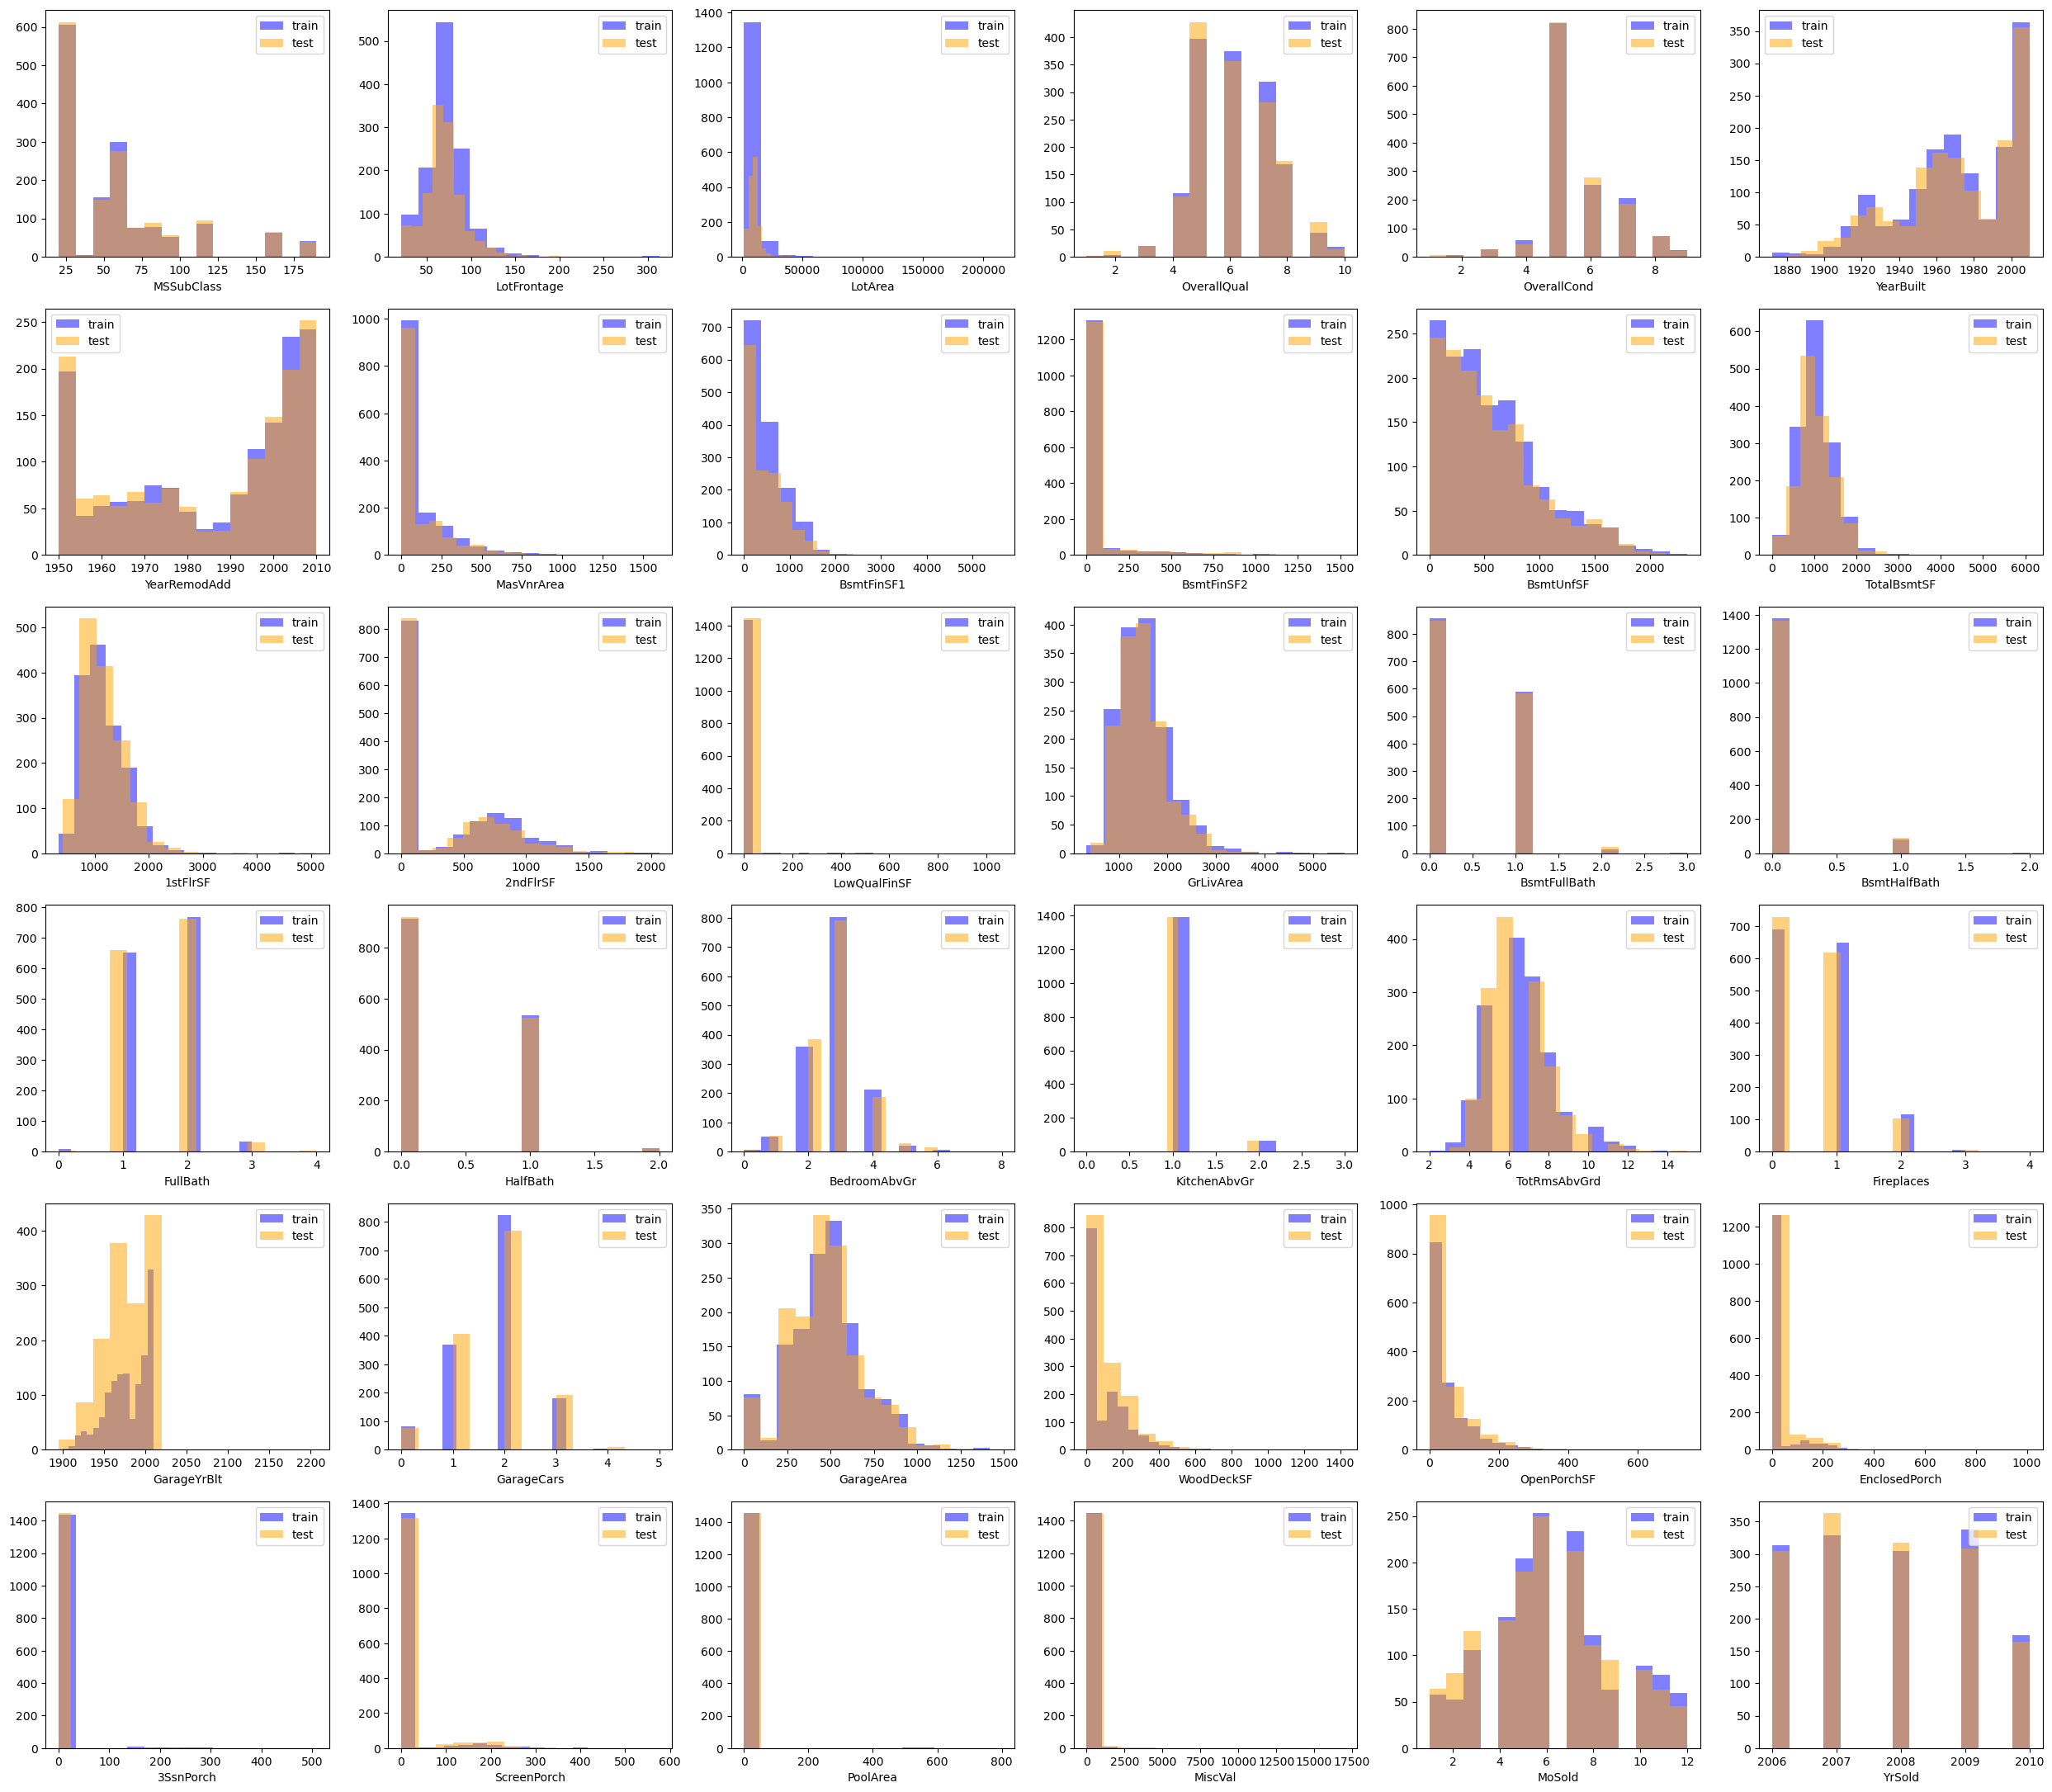

In [922]:
import matplotlib.pyplot as plt

plt.figure(figsize=(25,25))
for i in range(numeric_cols.shape[0]):
    col = numeric_cols[i]
    if col == 'SalePrice':
        continue
    plt.subplot(7, 6, i+1)
    plt.hist(train[col],bins=15, alpha=0.5, label='train', color='blue',density=False)
    plt.hist(test[col], bins=15,alpha=0.5, label='test', color='orange',density=False)
    plt.xlabel(col)
    plt.legend()
plt.tight_layout()


#### <ins> Plotting Numerical features vs SalePrice

<ins> Normalize for better comparison

In [923]:
cols_to_scale = train.select_dtypes(exclude='object').drop(['Id','SalePrice'],axis=1).columns

# create StandardScaler object for train
scaler = StandardScaler()
train_scaled = pd.DataFrame(scaler.fit_transform(train[cols_to_scale]), columns=cols_to_scale)
# scale the test columns using the scaler object from train
test_scaled = pd.DataFrame(scaler.transform(test[cols_to_scale]), columns=cols_to_scale)

<ins> Plot

Train: Sale Price VS normalized numeric columns


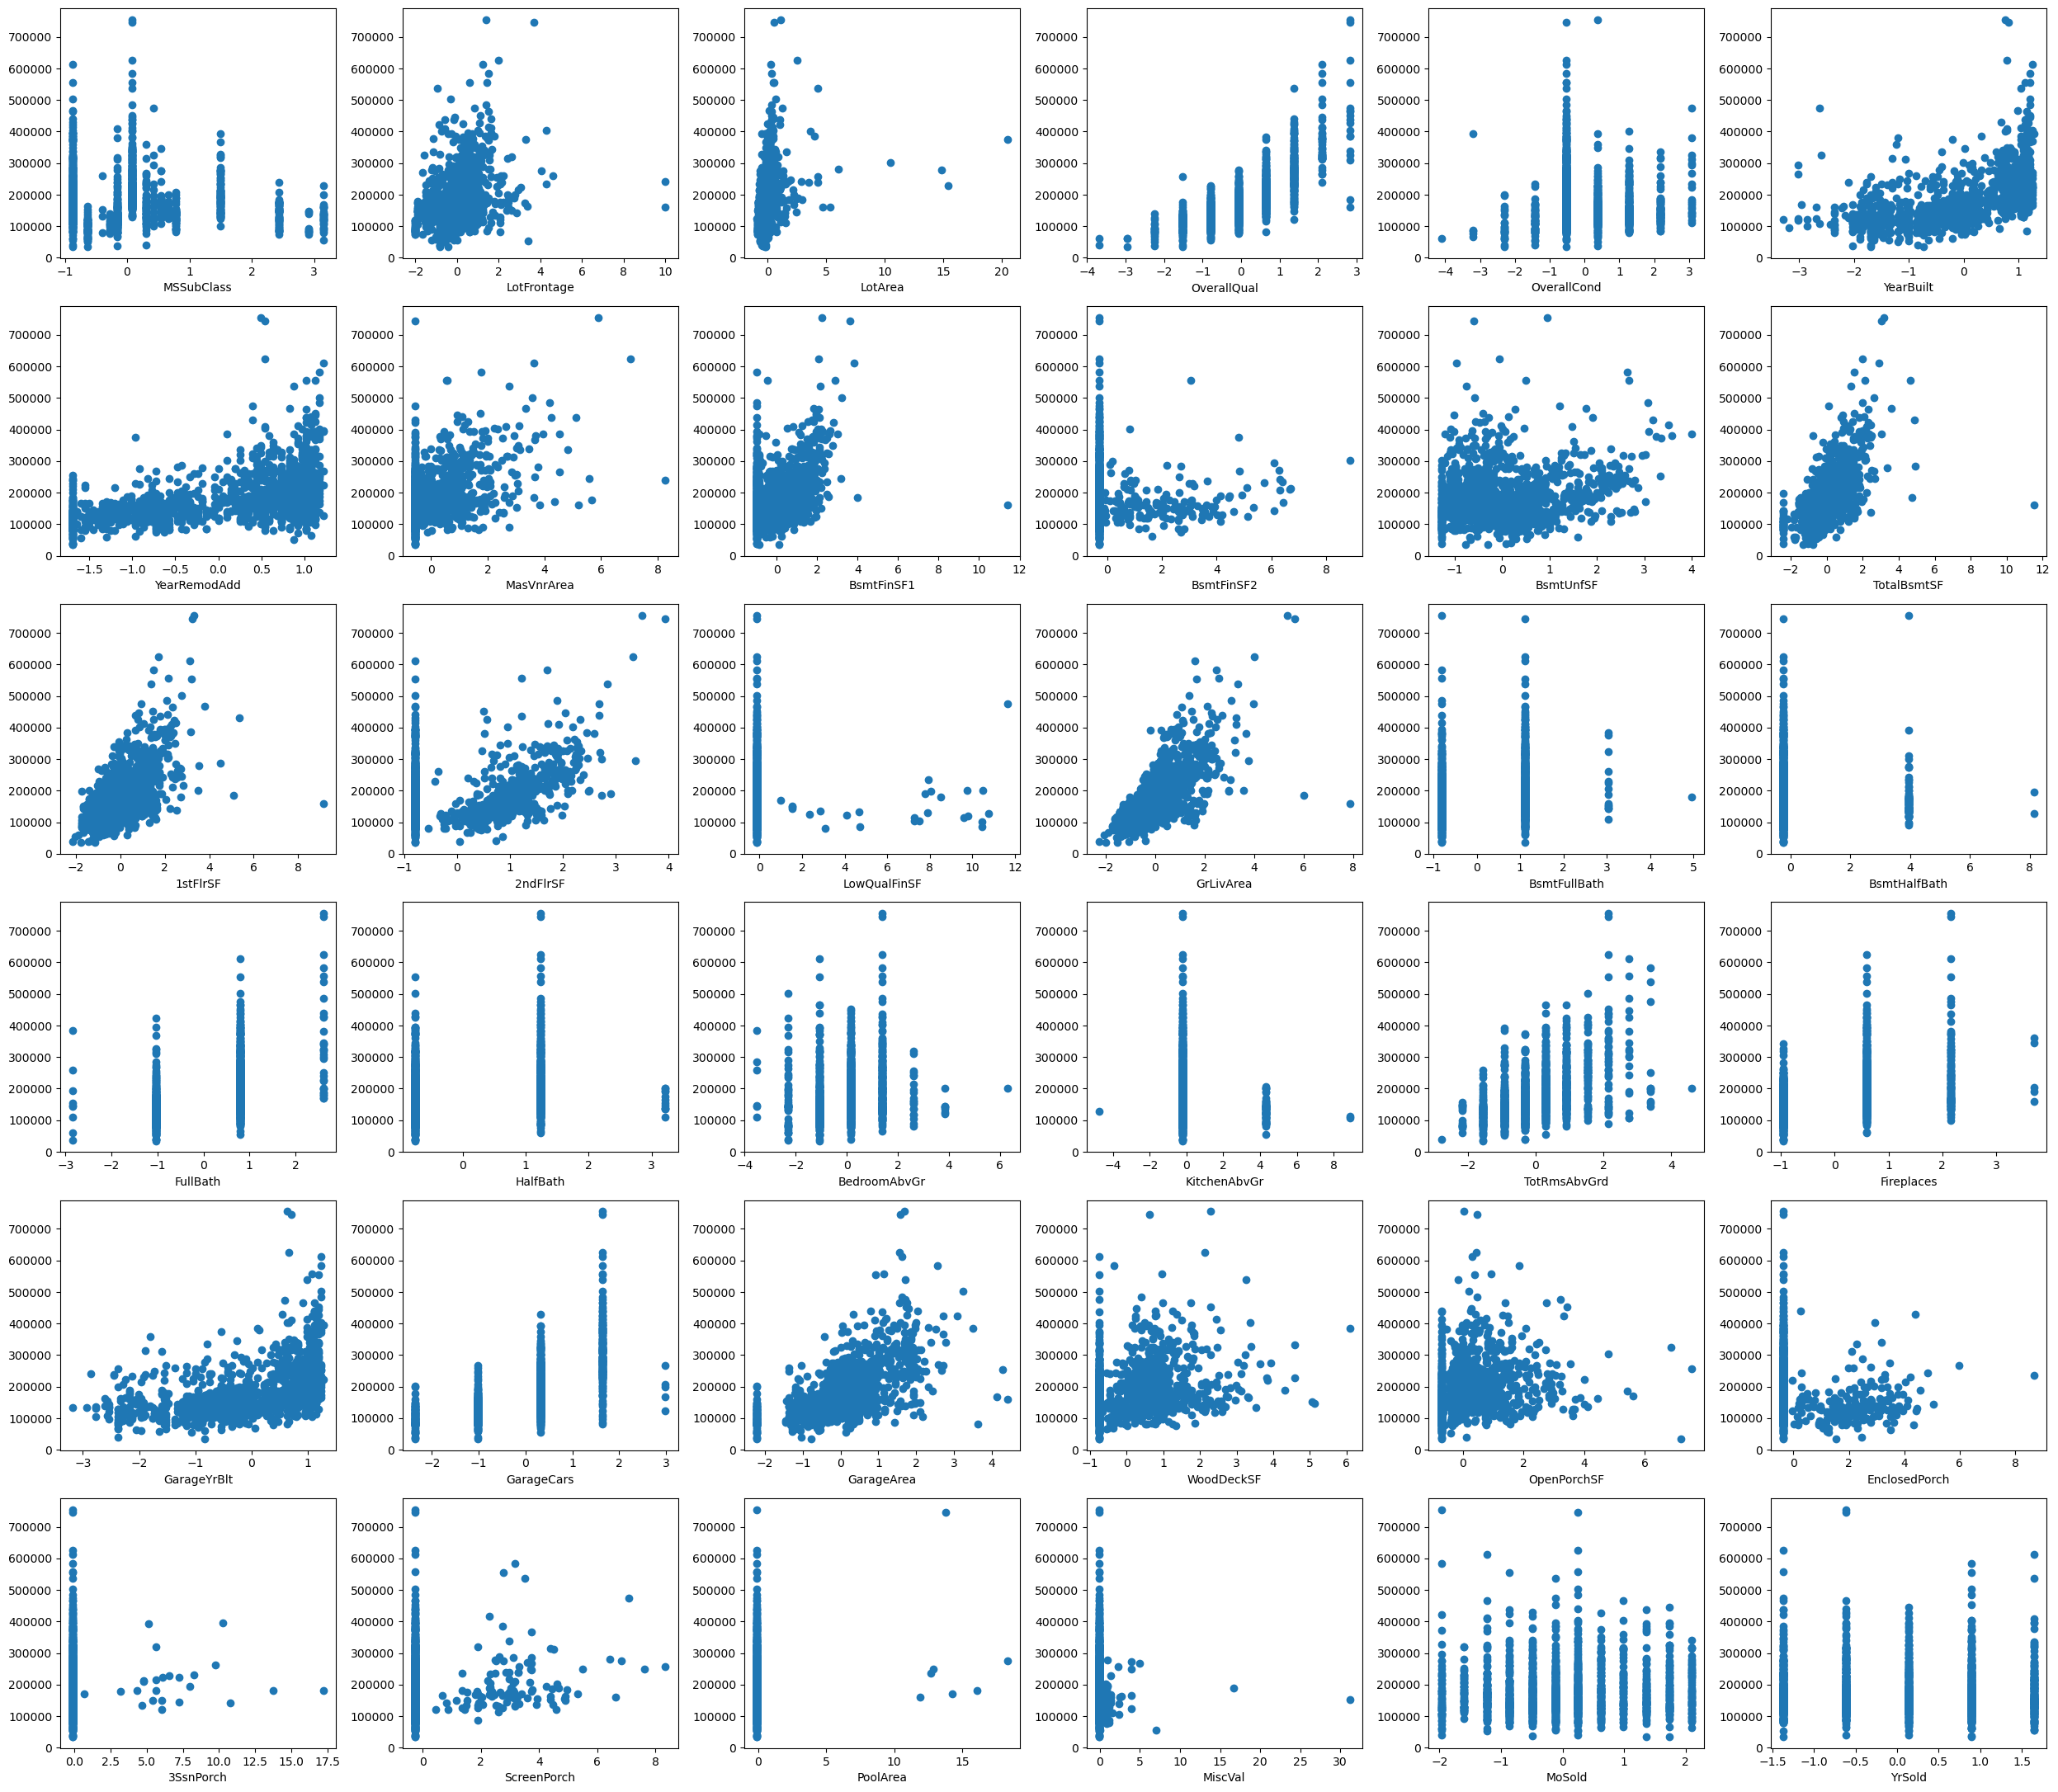

In [924]:
print('Train: Sale Price VS normalized numeric columns')
plt.figure(figsize=(25,25))
for i in range(train_scaled.columns.shape[0]):
    col = train_scaled.columns[i]
    plt.subplot(7, 6, i+1)
    # plt.hist(train_scaled[col],bins=15, alpha=0.5, label='train', color='blue',density=False)
    plt.scatter(x=train_scaled[col], y=train.SalePrice)
    # plt.hist(test[col], bins=15,alpha=0.5, label='test', color='orange',density=False)
    plt.xlabel(col)
plt.tight_layout()
plt.show()



Train: Sale Price VS unnormalized numeric columns


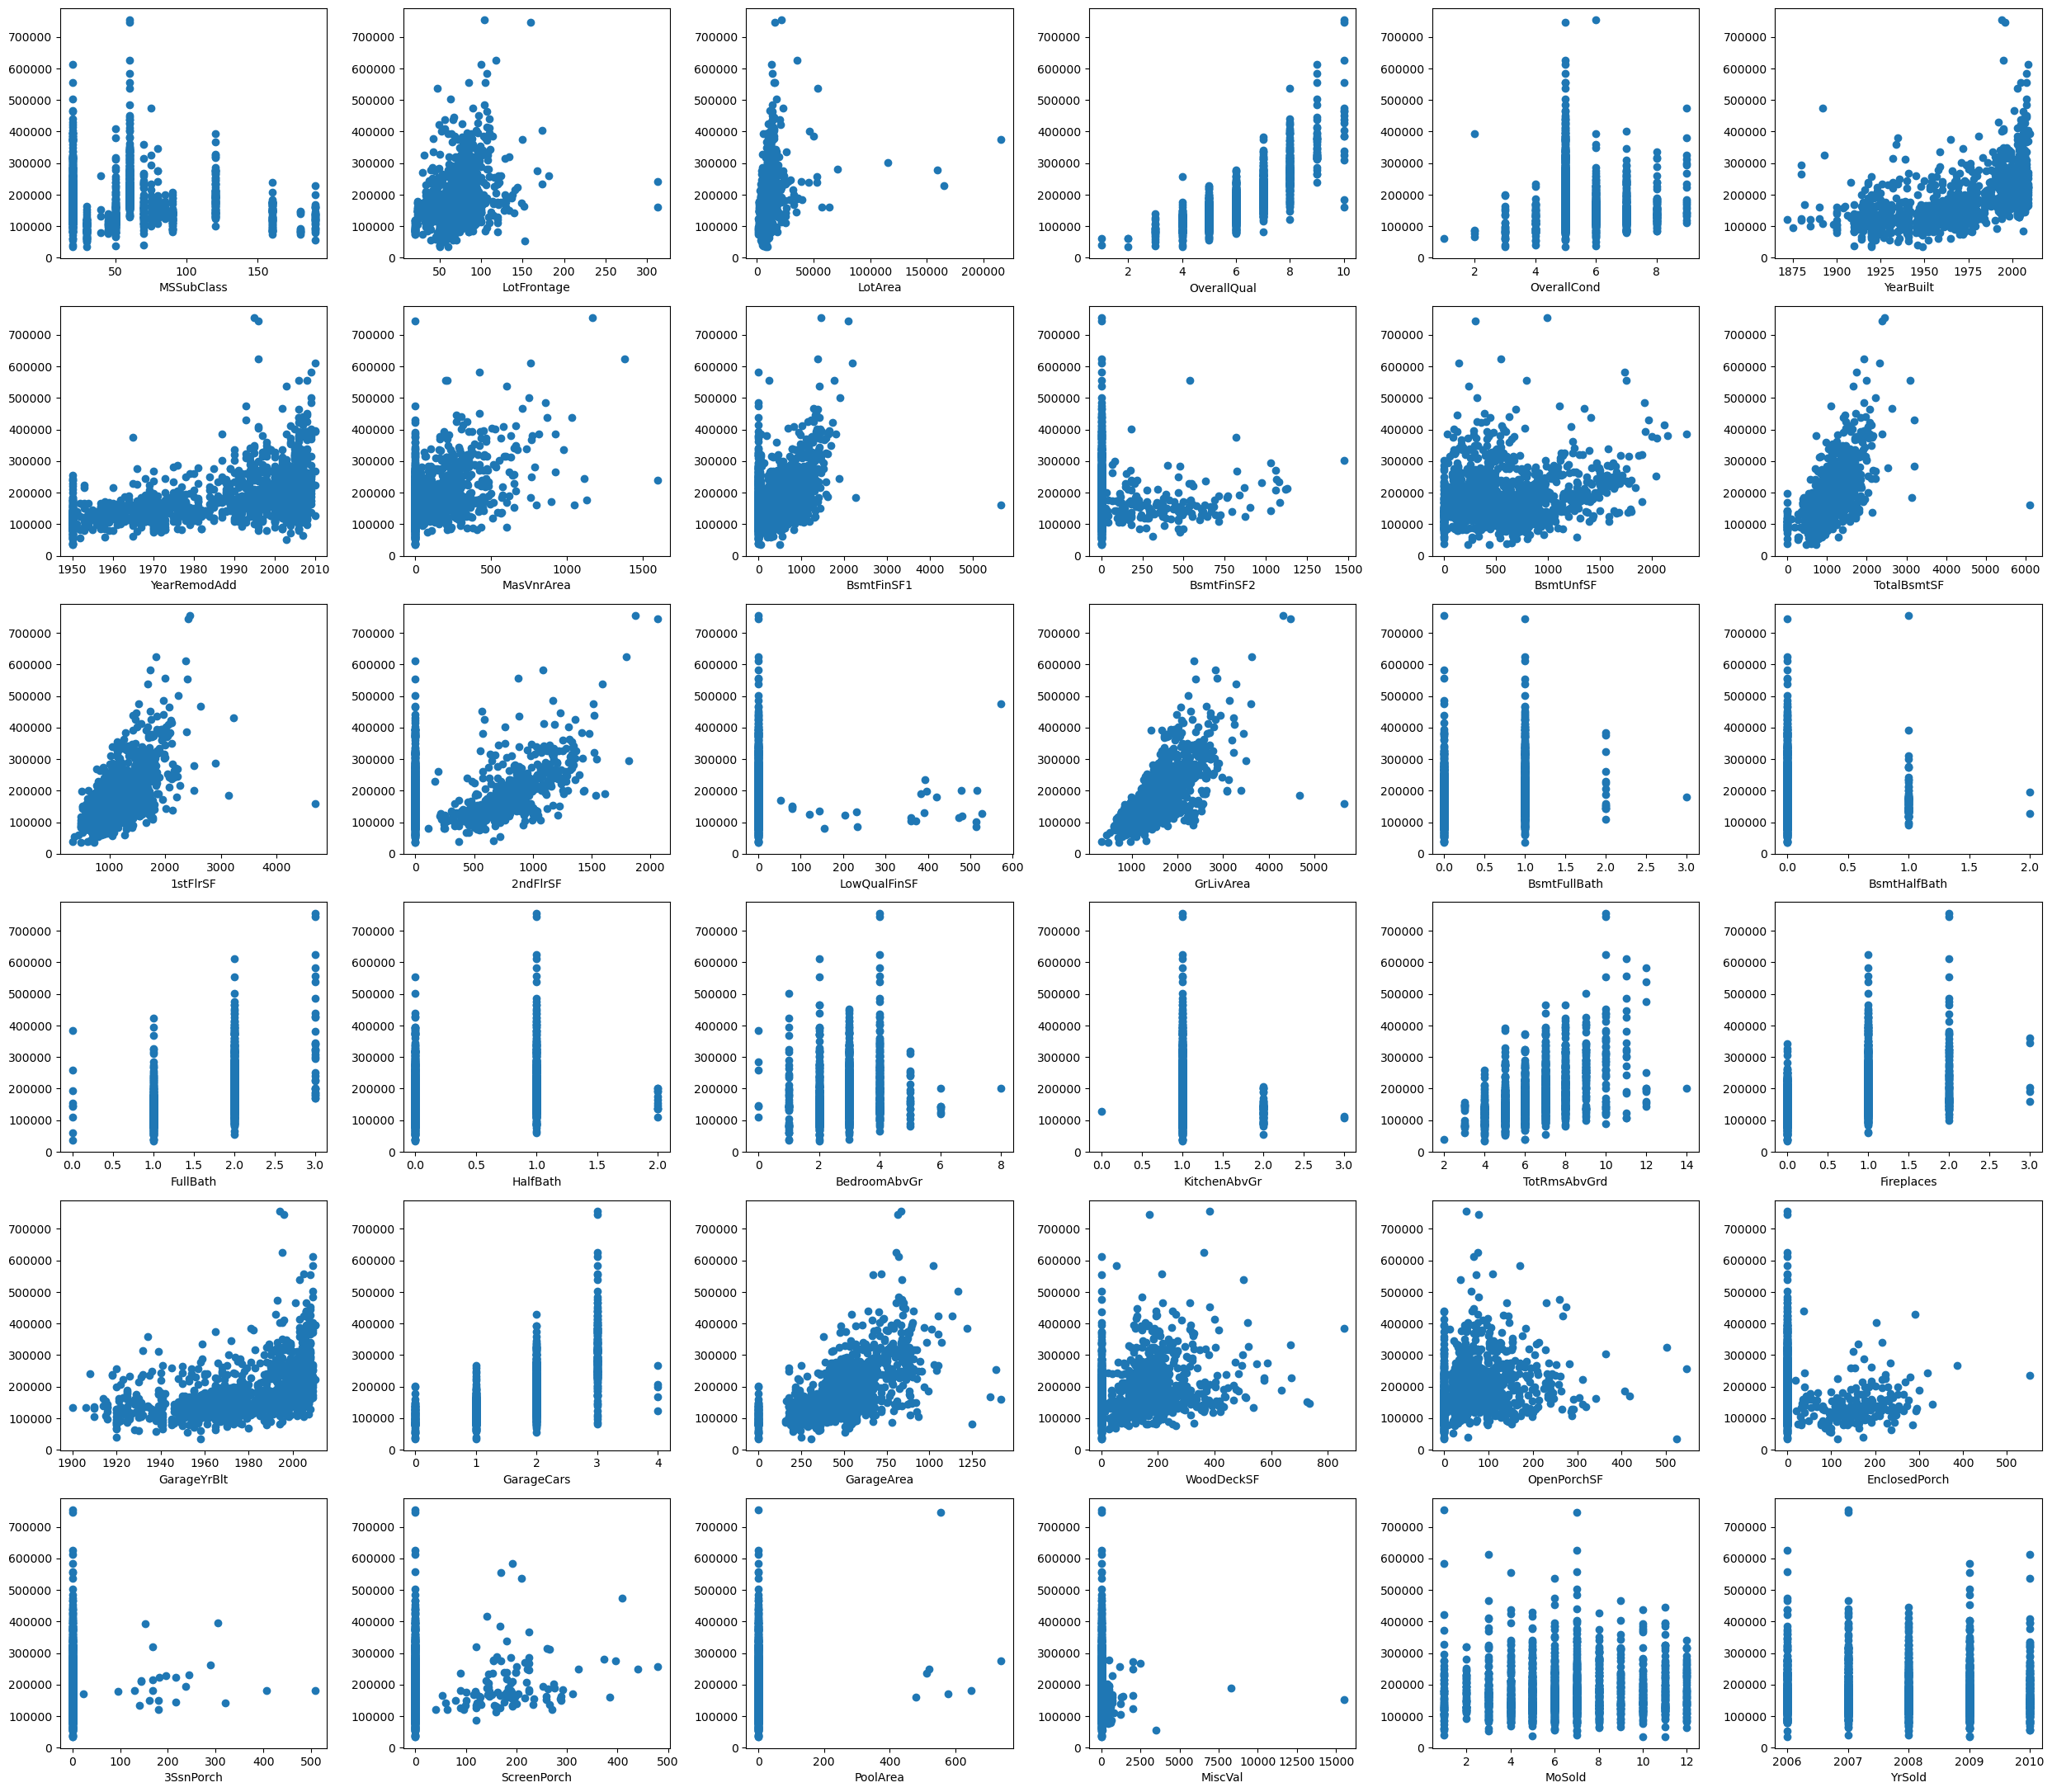

In [925]:
print('Train: Sale Price VS unnormalized numeric columns')
plt.figure(figsize=(25,25))
for i in range(train_scaled.columns.shape[0]):
    col = train_scaled.columns[i]
    plt.subplot(7, 6, i+1)
    # plt.hist(train_scaled[col],bins=15, alpha=0.5, label='train', color='blue',density=False)
    plt.scatter(x=train[col], y=train.SalePrice)
    # plt.hist(test[col], bins=15,alpha=0.5, label='test', color='orange',density=False)
    plt.xlabel(col)
plt.tight_layout()
plt.show()



#### <ins> Comparing Test and Train Categorical Features

1. We see they are quite similar in distributions
2. Some features have nearly no variance and will likely be dropped during data preprocessing

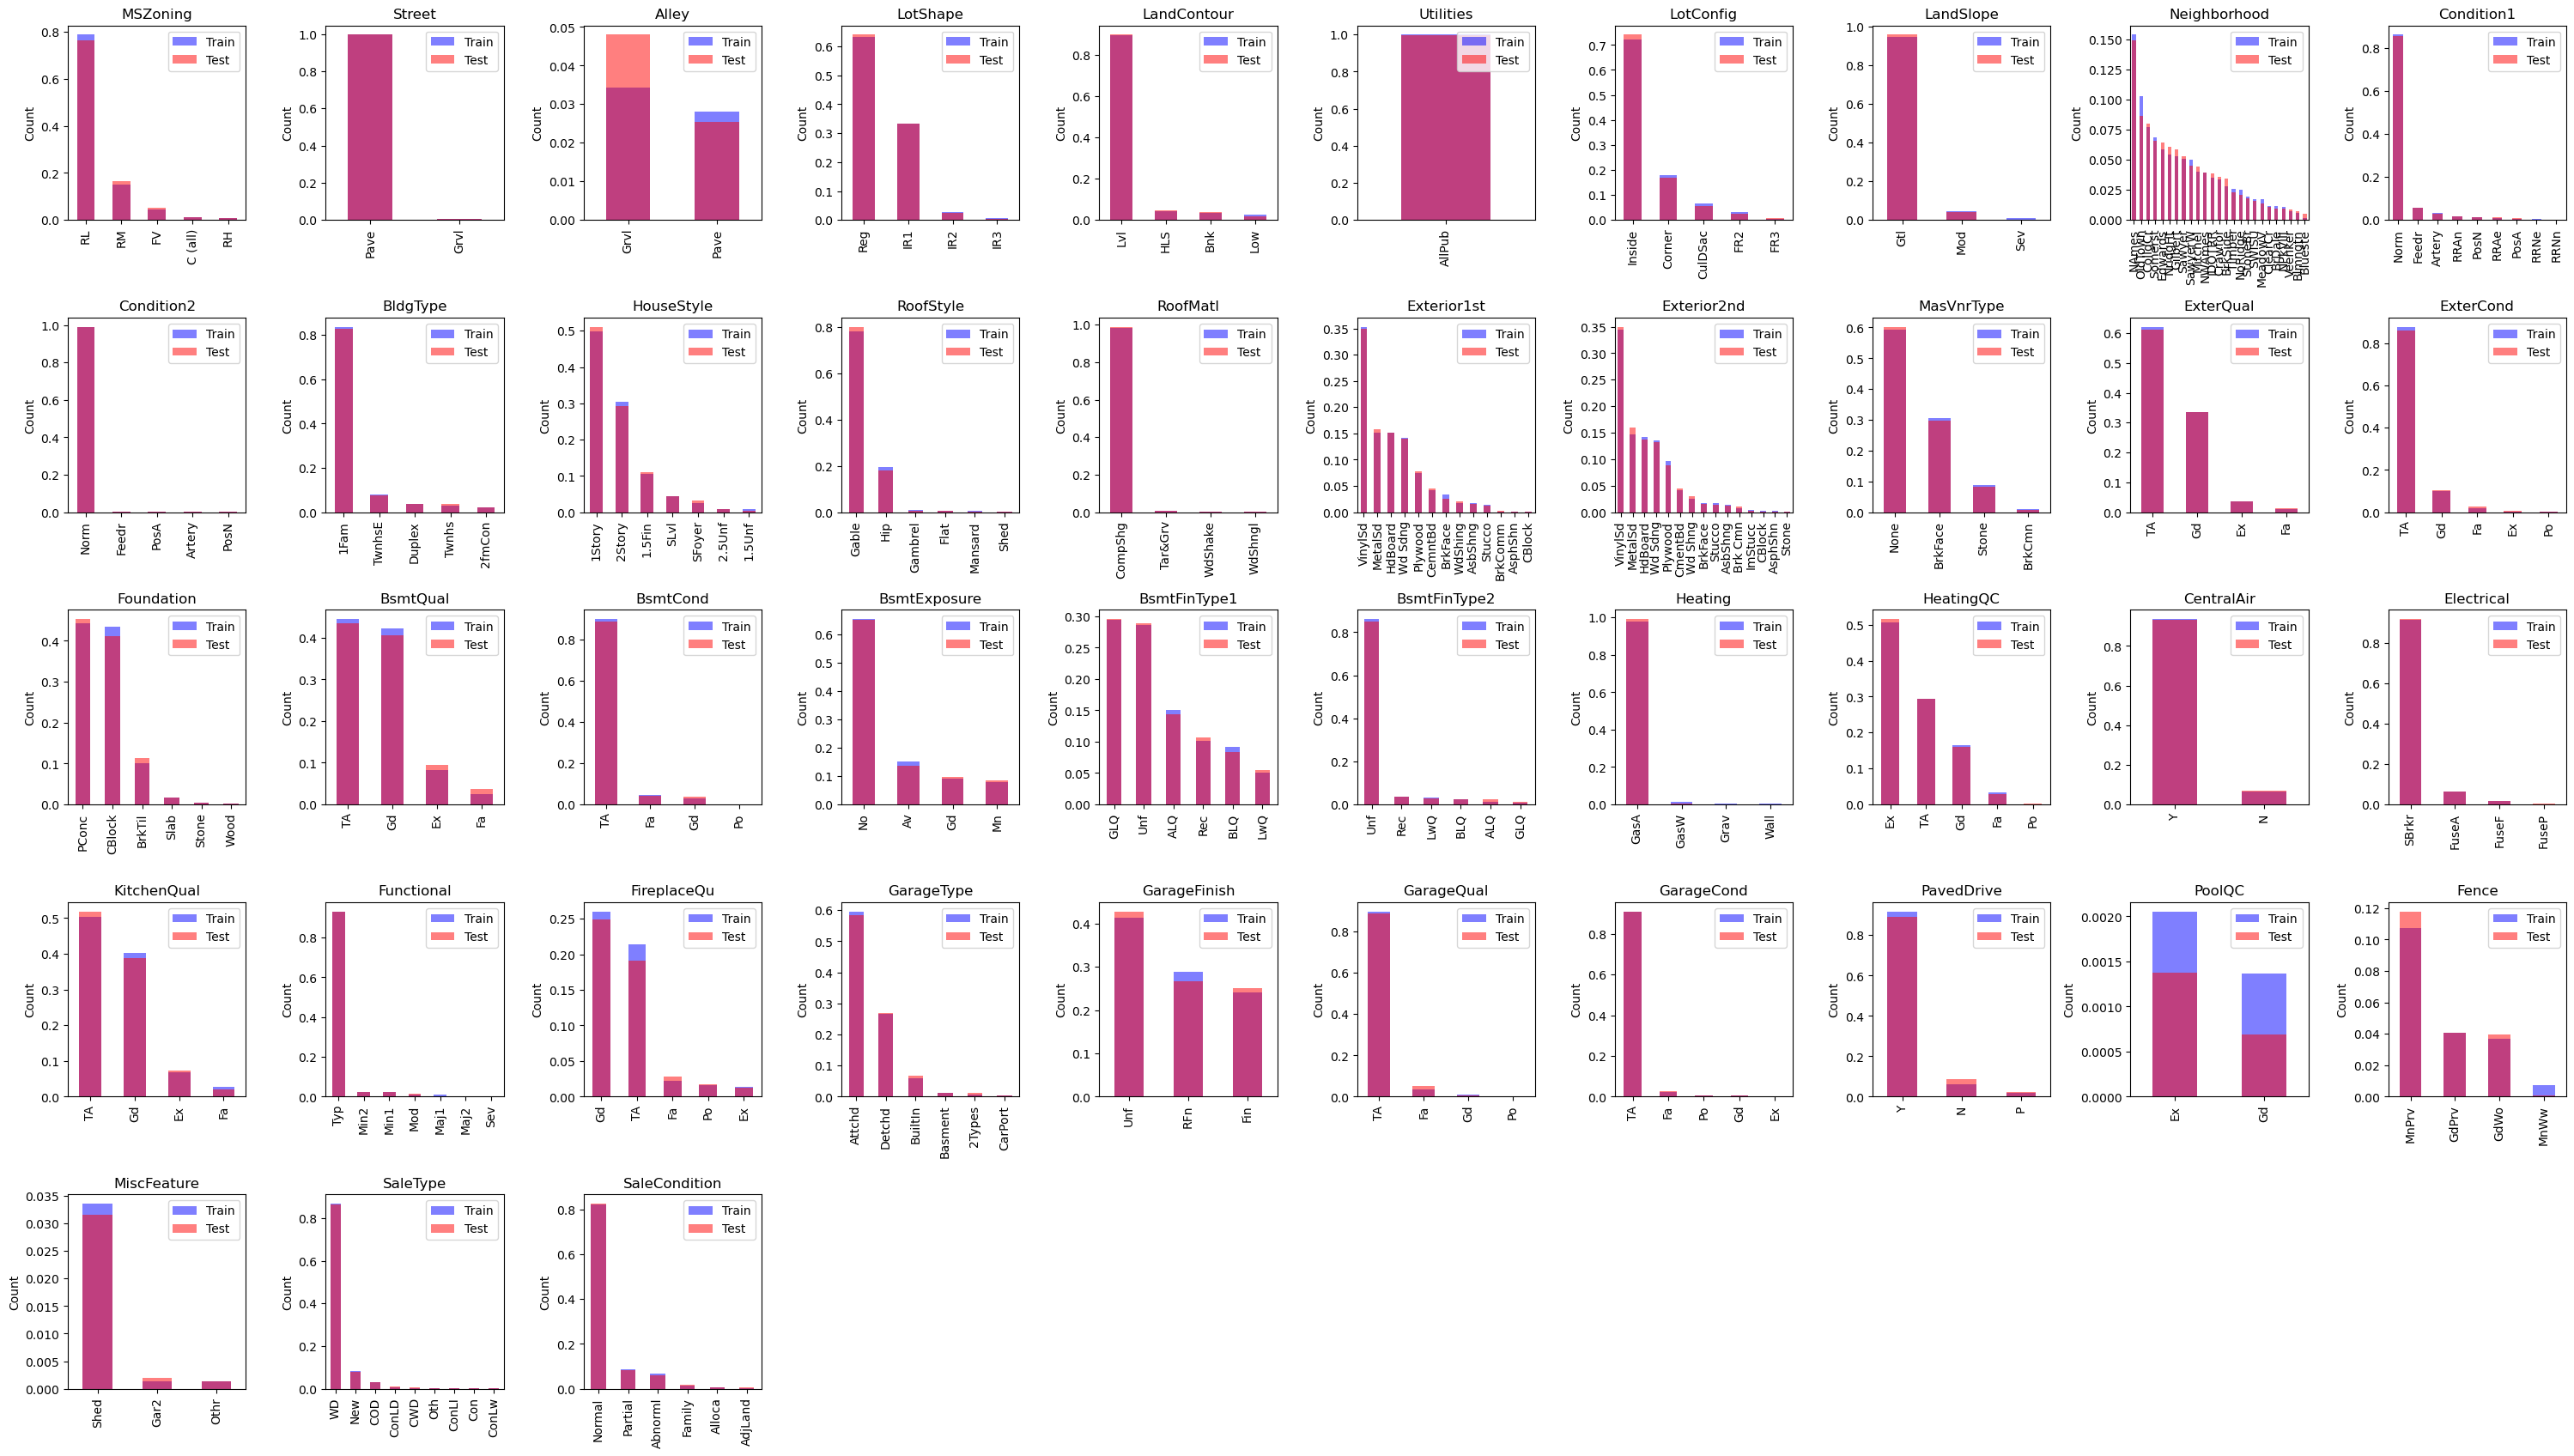

In [926]:
plt.figure(figsize=(30,30))
for i,col in enumerate (train.select_dtypes(include='object').columns):
# Count the number of occurrences of each neighborhood in both dataframes
    plt.subplot(9,10,i+1)
    train_counts = train[col].value_counts()
    test_counts = test[col].value_counts()
    train_density = train[col].value_counts() / train.shape[0]
    test_density = test[col].value_counts() / test.shape[0]

    # Plot the counts of neighborhoods on the same plot
    train_density.plot(kind='bar', color='blue', alpha=0.5, label='Train')
    test_density.plot(kind='bar', color='red', alpha=0.5, label='Test')


    # Add a title and labels to the x and y axes
    plt.title(col)
    plt.ylabel("Count")

    # Add a legend to the plot
    plt.legend()
plt.tight_layout()
# Show the plot

#### <ins> Plotting SalePrice  
Since this is a regression problem, we would like the target to be normally and symmetrically distributed  
Since SalePrice is right-skewed, we will might use log SalePrice to reduce that skew and improve predictions

SalrPrice Skew =  1.8828757597682129


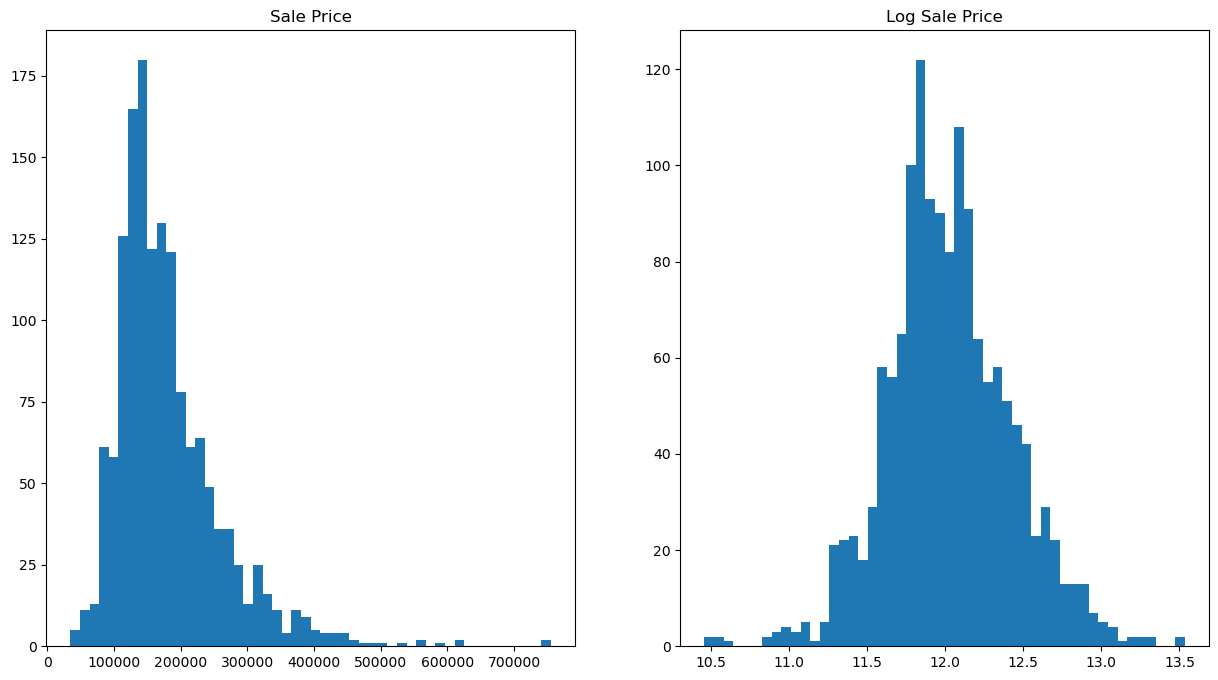

In [927]:
print('SalrPrice Skew = ', train.SalePrice.skew())

fig, axs = plt.subplots(1,2, figsize=(15,8))

axs[0].hist(train['SalePrice'], bins=50)
axs[0].set_title('Sale Price')
axs[1].hist(np.log(train['SalePrice']), bins=50)
axs[1].set_title('Log Sale Price')
plt.show()

# <ins> Data Preprocessing

## <ins> Simple Imputation of Missing Data

The most crucial missing-data is LotFrontage that has ~250 rows in test and train. for now we will assign 0 to it, however this needs to be looked at thoroughly.
Looking at the data, is appears that most missing correspond to feature not existing, such as MasVnrArea = 0 when there is no mason.
Initially we will fill missing values with either mode , 0 , or None for our basic model.
Later these simple assumptions will be improved

We will also drop few features with low variance that are not likely to affect model prediction ("Fence", "MiscFeature", "Utilities").  
However ,this assumption should be tested later.

In [928]:
fill_with_zero =['MasVnrArea','LotFrontage','GarageYrBlt','TotalBsmtSF','GarageCars','GarageArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','BsmtFullBath','BsmtHalfBath',]
fill_with_none = ['Fence','MiscFeature','MasVnrType','BsmtExposure','BsmtFinType2','BsmtFinType1','BsmtQual','BsmtCond','PoolQC','Alley','FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond']


## These will be used later
missing_LotFrontage_test_index = test[test.LotFrontage.isna()].index
missing_LotFrontage_train_index = test[test.LotFrontage.isna()].index


for col in fill_with_zero:
    train[col].fillna(0,inplace=True)
    test[col].fillna(0,inplace=True)

for col in fill_with_none:
    train[col].fillna("None",inplace=True)
    test[col].fillna("None",inplace=True)



# Filled with mode
test = test.fillna({"MSZoning": "RL"})
test = test.fillna({"Exterior1st": "VinylSd"})
test = test.fillna({"Exterior2nd": "VinylSd"})
train = train.fillna({"Electrical": "SBrkr"})
test = test.fillna({"KitchenQual": "TA"})
test = test.fillna({"Functional": "Typ"})
test = test.fillna({"SaleType": "WD"})
test.Utilities.fillna('AllPub',inplace=True)

train = train.drop(["Fence", "MiscFeature", "Utilities"], axis=1)
test = test.drop(["Fence", "MiscFeature", "Utilities"], axis=1)

y = train["SalePrice"]


## <ins> Simple Handling of Categorical Features with get_dummies and Aligning Dataframes

In [929]:
train_dummies = pd.get_dummies(pd.concat((train.drop(["SalePrice", "Id"], axis=1), test.drop(["Id"], axis=1)), axis=0)).iloc[: train.shape[0]]
test_dummies = pd.get_dummies(pd.concat((train.drop(["SalePrice", "Id"], axis=1), test.drop(["Id"], axis=1)), axis=0)).iloc[train.shape[0]:]

# <ins> Creating Baseline Model  
We decided to use DecisionTree Regressor, submission score = 0.184

In [930]:

# Define the parameter grid
param_grid = {'max_depth': [2, 4, 6, 8, 10],
              'min_samples_split': [2, 4, 6, 8, 10],
              'min_samples_leaf': [15,30,50],
              'random_state': [42]}

# Create the regressor
regressor = DecisionTreeRegressor()

# Create the grid search object
grid_search = GridSearchCV(regressor, param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True)

# Fit the grid search to the data
grid_search.fit(train_dummies, y)

# Get the best parameters
best_params = grid_search.best_params_

# Get the best score
best_score = grid_search.best_score_

# Print the best parameters and best score
print("Best parameters:", best_params)
baseline_model = grid_search.best_estimator_

Best parameters: {'max_depth': 10, 'min_samples_leaf': 15, 'min_samples_split': 2, 'random_state': 42}


## <ins> Save Submission

In [931]:
baseline_model.fit(train_dummies,y)
pred = baseline_model.predict(test_dummies)
output = pd.DataFrame({'Id': test_ID,
                       'SalePrice': pred})

output.to_csv('Baseline_submission.csv', index=False)

# <ins> Improving Data Preprocessing

## <ins> Removing Outliers  
Based on inspection of SalePrice vs numeric columns plot and outliers boxplots  

In [932]:
train.drop(train[train.LotFrontage> 200].index, inplace= True) # maybe change to 150?
train.drop(train[train.LotArea > 100000].index, inplace= True) # perhaps lower?
train.drop(train[train.BsmtFinSF1 > 4000].index, inplace= True) # Try 2500
train.drop(train[train.TotalBsmtSF > 6000].index, inplace= True) # 2500
train.drop(train[train['1stFlrSF'] > 4000].index, inplace= True) # try 2600
train.drop(train[(train.GrLivArea > 4000) & (y < 300000)].index, inplace= True) # y = SalePrice, try without target limitation
train.drop( train[ train.LowQualFinSF> 550].index, inplace= True) # maybe drop this?
y = np.log(train.SalePrice)

## <ins> Converting Ordinal Categories  
Some of the categorical features are ordinal in nature so we will try assign the values.

However in hindsight doing this did not improve model and even worsened results

In [933]:
# ordinal_cols = ['ExterCond','ExterQual', 'BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','HeatingQC','KitchenQual','Functional','FireplaceQu','GarageFinish','GarageQual']


# mapping = {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0,
#     'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1,
#     'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1,
#     'Typ': 7, 'Min1': 6, 'Min2': 5, 'Mod': 4, 'Maj1': 3, 'Maj2': 2, 'Sev': 1, 'Sal': 0,
#     'Fin': 3, 'RFn': 2, 'Unf': 1}


# for col in ordinal_cols:
#     train[col] = train[col].map(mapping)
#     test[col] = test[col].map(mapping)

# train.MSZoning = train.MSZoning.astype(str)
# test.MSZoning = test.MSZoning.astype(str)


## <ins> Feature Engineering  
We try here to create features that could help predict, however none of them improved results in the end.

In [934]:
# n_rooms = ['BedroomAbvGr','TotRmsAbvGrd']
# n_bathrooms = ['BsmtFullBath', 'BsmtHalfBath', 'FullBath','HalfBath']
# porch_area = [ 'OpenPorchSF','EnclosedPorch', '3SsnPorch', 'ScreenPorch']

# train['n_rooms'] = train[n_rooms].sum(axis=1)
# train['n_bathrooms'] = train.BsmtFullBath + train.BsmtHalfBath * 0.5 + train.FullBath + train.HalfBath * 0.5
# train['porch_area'] = train[porch_area].sum(axis=1)
# train['years_till_remod'] = train.YearBuilt - train.YearRemodAdd 
# train['years_since_remod'] = train.YrSold - train.YearRemodAdd 
# train['age_at_sell'] = train.YrSold - train.YearRemodAdd
# train['LowQualSF'] = train.LowQualFinSF + train.BsmtUnfSF


# test['n_rooms'] = test[n_rooms].sum(axis=1)
# test['n_bathrooms'] = test.BsmtFullBath + test.BsmtHalfBath * 0.5 + test.FullBath + test.HalfBath * 0.5
# test['porch_area'] = test[porch_area].sum(axis=1)
# test['years_till_remod'] = test.YearBuilt - test.YearRemodAdd 
# test['years_since_remod'] = test.YrSold - test.YearRemodAdd 
# test['age_at_sell'] = test.YrSold - test.YearBuilt
# test['LowQualSF'] = test.LowQualFinSF + test.BsmtUnfSF

<ins> Convert y to Log to reduce skew for regression models and create dummies

In [935]:
train_dummies = pd.get_dummies(pd.concat((train.drop(["SalePrice", "Id"], axis=1), test.drop(["Id"], axis=1)), axis=0)).iloc[: train.shape[0]]
test_dummies = pd.get_dummies(pd.concat((train.drop(["SalePrice", "Id"], axis=1), test.drop(["Id"], axis=1)), axis=0)).iloc[train.shape[0]:]

## <ins> Normalizing Data  
Used to help regressors converge and produce better results

In [943]:
cols_to_scale = train.select_dtypes(exclude='object').drop(['SalePrice','Id','MSSubClass'],axis=1).columns

scaler = StandardScaler()
train_dummies[cols_to_scale] = scaler.fit_transform(train_dummies[cols_to_scale])
test_dummies[cols_to_scale] = scaler.transform(test_dummies[cols_to_scale])

# <ins> Moving From Basic Model to Ensemble

## <ins> Hypertuning models
We chose 5 of models for the ensemble after trying many models (for example KNN regressor was tested but not chosen)


The GridSearch cells are commented to avoid running them since this is about 30 min long.  
In a cell below we saved the best performing hyperparameters which is ran without adding features engineering or assigning values to ordinal features.

<ins> Gradient Boosting

In [944]:
param_grid = {
    'n_estimators': [100,150,200],
    'learning_rate': [0.05,0.01, 0.1],
    'max_depth': [2,4, 5,10],
    'random_state': [42]}
best_GB = GradientBoostingRegressor()

# -------------------------------------------------------
grid_search = GridSearchCV(best_GB, param_grid, cv=5, 
                           scoring='neg_mean_squared_error')
grid_search.fit(train_dummies, y)
best_GB = GradientBoostingRegressor(**grid_search.best_params_)
print(grid_search.best_params_)
print("Best Score: ", -grid_search.best_score_)



<ins> Ridge Regression

In [ ]:

param_grid = {
    'alpha': [0.01,0.1, 1.0, 10.0],
    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga'],
    'random_state': [42]}
best_RR = Ridge()
grid_search = GridSearchCV(best_RR, param_grid, cv=5, 
                           scoring='neg_mean_squared_error')
grid_search.fit(train_dummies, y)
best_RR = Ridge(**grid_search.best_params_)
print(grid_search.best_params_)
print("Best Score: ", -grid_search.best_score_)


{'alpha': 10.0, 'random_state': 42, 'solver': 'auto'}
Best Score:  0.00804943996523268


<ins> Elastic Network

In [ ]:
param_grid = {
    'alpha': [0.1, 0.5, 1.0, 2.0, 0.01],
    'l1_ratio': [0.1, 0.5, 0.7, 0.9, 1.0,0.1,0.05],
    'random_state': [42]
}

best_EN = ElasticNet()

grid_search = GridSearchCV(best_EN, param_grid, cv=5, 
                           scoring='neg_mean_squared_error')

grid_search.fit(train_dummies, y)

best_EN = ElasticNet(**grid_search.best_params_)
print(grid_search.best_params_)
print("Best Score: ", -grid_search.best_score_)



{'alpha': 0.01, 'l1_ratio': 0.05, 'random_state': 42}
Best Score:  0.007998677860688688


<ins> RandomForest

In [ ]:

param_grid = {
    'n_estimators': [100,150,200],
    'max_depth': [2, 5, 10, 15,20],
    'max_features': [10,20,30,'auto'],
    'random_state': [42]
}


best_RF = RandomForestRegressor()

grid_search = GridSearchCV(best_RF, param_grid, cv=5, 
                           scoring='neg_mean_squared_error')

grid_search.fit(train_dummies, y)

best_RF = RandomForestRegressor(**grid_search.best_params_)
print(grid_search.best_params_)
print("Best Score: ", -grid_search.best_score_)



{'max_depth': 20, 'max_features': 30, 'n_estimators': 200, 'random_state': 42}
Best Score:  0.013548233234361256


<ins> Lasso

In [ ]:
param_grid = [{'alpha': [0.1,0.01,0.5,0.05,0.005,0.0005], 'random_state':[42]}]
best_lasso = Lasso()
grid_search = GridSearchCV(best_lasso, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(train_dummies, y)
best_lasso = Lasso(**grid_search.best_params_)
print(grid_search.best_params_)
print("Best Score: ", -grid_search.best_score_)


{'alpha': 0.0005, 'random_state': 42}
Best Score:  0.007827383490185974


### <ins> Create best models (so we dont run gridsearch each time) 

In [ ]:
best_RF =  RandomForestRegressor(**{'max_depth': 15, 'max_features': 30, 'n_estimators': 200, 'random_state': 42})
best_EN = ElasticNet(**{'alpha': 0.01, 'l1_ratio': 0.05, 'random_state': 42})
best_RR = Ridge(**{'alpha': 10.0, 'max_iter': 1000, 'random_state': 42, 'solver': 'sparse_cg'})
best_GB = GradientBoostingRegressor(**{'learning_rate': 0.05, 'max_depth': 4, 'n_estimators': 200, 'random_state': 42})
best_lasso = Lasso(**{'alpha': 0.0005, 'random_state': 42})

## <ins> Fit Best Models

In [ ]:
best_EN.fit(train_dummies,y)
best_GB.fit(train_dummies,y)
best_lasso.fit(train_dummies,y)
best_RR.fit(train_dummies,y)
best_RF.fit(train_dummies,y)

RandomForestRegressor(max_depth=15, max_features=30, n_estimators=200,
                      random_state=42)

## <ins> Predict

In [ ]:
EN_pred = np.exp(best_EN.predict(test_dummies))
GB_pred = np.exp(best_GB.predict(test_dummies))
RR_pred = np.exp(best_RR.predict(test_dummies))
lasso_pred = np.exp(best_lasso.predict(test_dummies))
RF_pred = np.exp(best_RF.predict(test_dummies))
final_pred = (EN_pred +  + lasso_pred + +RR_pred+GB_pred)/5

## <ins> Save Submission

In [ ]:
output = pd.DataFrame({'Id': test_ID,
                       'SalePrice': final_pred})

output.to_csv('final_submission.csv', index=False)

# <ins> What Could Be Improved?

1. Many of the assumptions made on the data should be tested.
2. We did not try all possible features engineering we had come up with, such as using ratios of LotArea to number of rooms and so on.
3. Despite regression models giving low weight to unimportant features, perhaps dropping more of them would improve results
4. We encoded all the ordinal features at the same time, however perhaps only encoding some of them would improve results while keeping others as dummies.